In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
path = "IMDB_Dataset.csv"
df = pd.read_csv(path)

In [4]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
df['sentiment'].value_counts()

,count
sentiment,
positive,25000
negative,25000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [7]:
def clean_review(review):
  str = ''.join(word for word in review.split() if word.lower() not in stopwords.words('english'))
  return str

In [8]:
df['review'] = df['review'].apply(clean_review)

In [9]:
from wordcloud import WordCloud

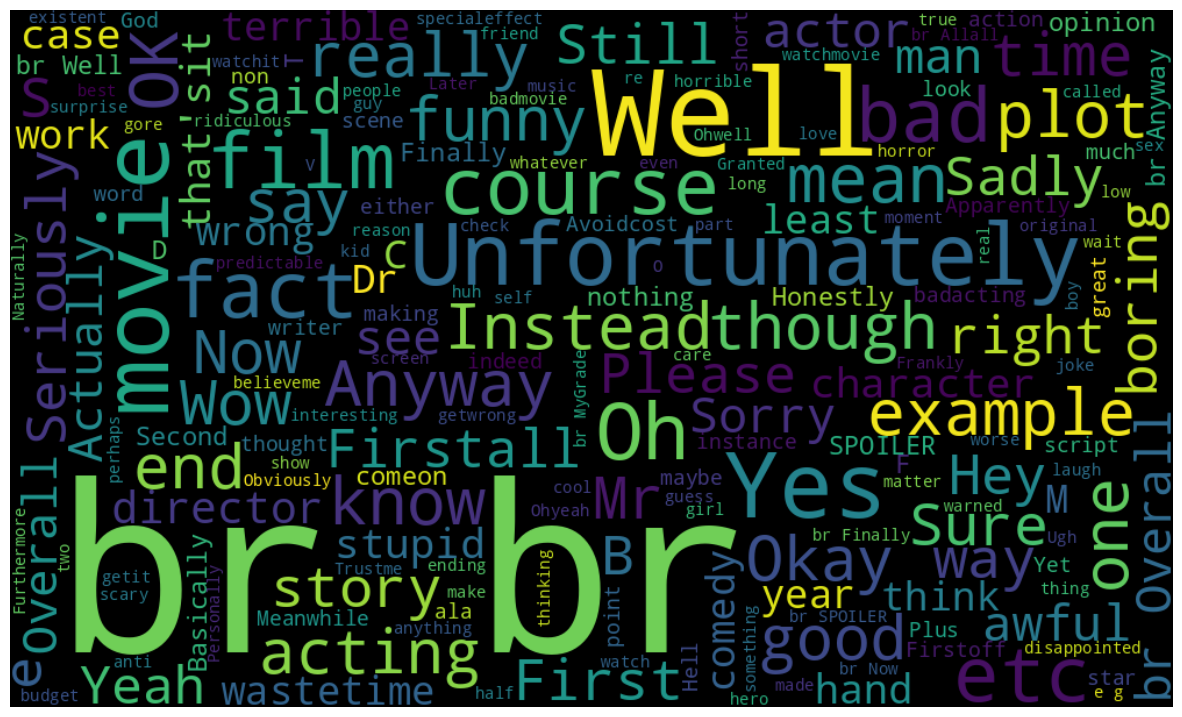

In [10]:
reviews = ''.join(word for word in df['review'][df['sentiment'] == 'negative'].astype(str))
wordcloud = WordCloud(height=600, width=1000, max_font_size=200)
plt.figure(figsize=(15,12))
plt.imshow(wordcloud.generate(reviews), interpolation='bilinear')
plt.axis('off')
plt.show()

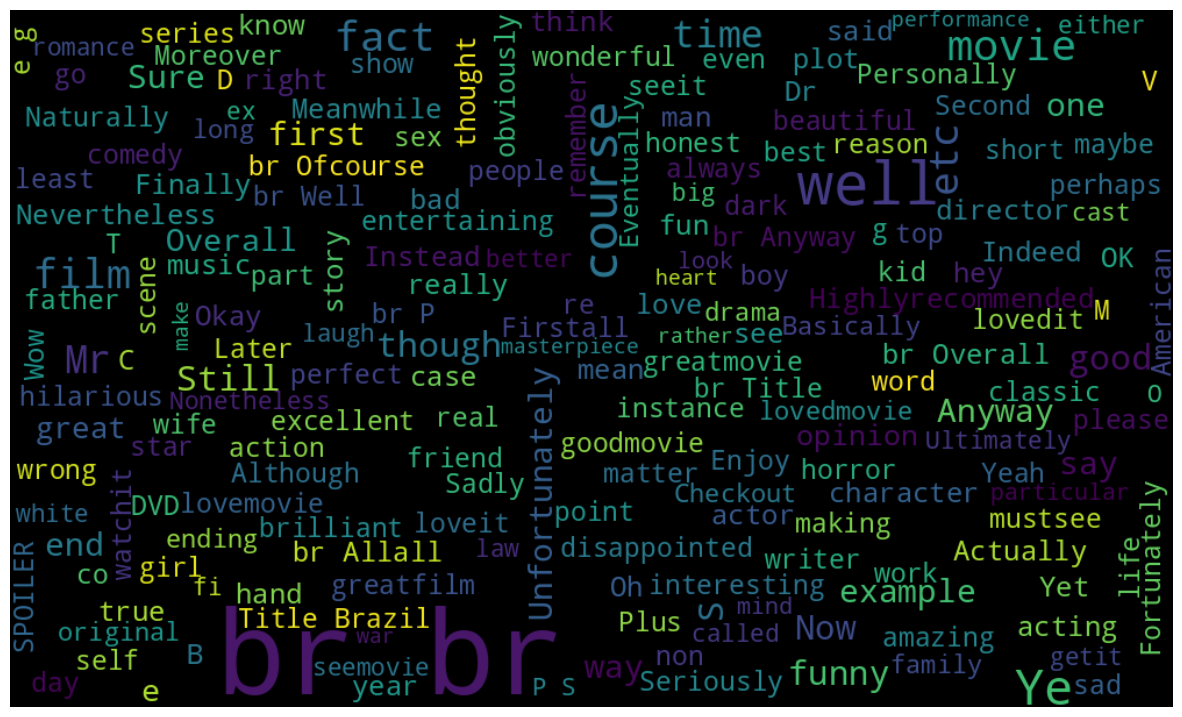

In [11]:
reviews = ''.join(word for word in df['review'][df['sentiment']=='positive'].astype(str))
wordcloud = WordCloud(height=600, width= 1000, max_font_size=100)
plt.figure(figsize=(15,12))
plt.imshow(wordcloud.generate(reviews), interpolation='bilinear')
plt.axis('off')
plt.show()

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(max_features=2500)

In [ ]:
reviews = cv.fit_transform(df['review']).toarray()

In [30]:
sentiments = df['sentiment'].replace(['positive', 'negative'], [1,0])

In [31]:
sentiments.value_counts()

,count
sentiment,
1,25000
0,25000


In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
model = LogisticRegression()

In [32]:
from sklearn.model_selection import train_test_split
reviews_train, reviews_test, sent_train, sent_test = train_test_split(reviews, sentiments, test_size=0.2)

In [33]:
model.fit(reviews_train, sent_train)

LogisticRegression()

In [34]:
predict = model.predict(reviews_test)

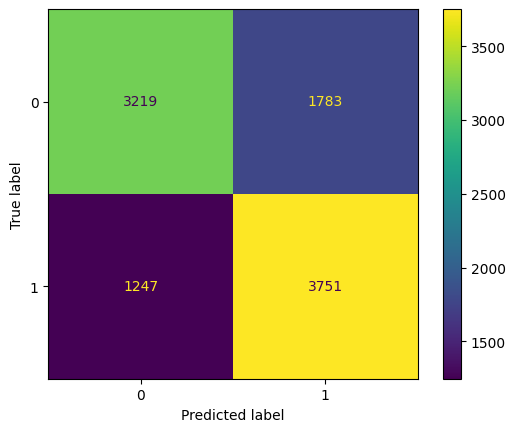

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(sent_test, predict)
display = ConfusionMatrixDisplay(cm, display_labels=model.classes_)
display.plot()
plt.show()

In [22]:
import pickle as pk

In [36]:
pk.dump(model, open('model.pkl', 'wb'))

In [37]:
pk.dump(cv, open('scaler.pkl', 'wb'))